<div style="background-color: #4CAF50; color: white; padding: 10px; border-radius: 5px; display: flex; align-items: center;">
    <h1 style="margin: 0 auto; font-size: 30px; font-weight: bold; font-family: Helvetica">การวิเคราะห์ข้อมูลด้วยโครงข่ายประสาทเทียม (Neural Network)</h1>
</div>

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">เครื่องมือที่จะใช้ใน Lab นี้:</h1>

In [1]:
# นำเข้าไลบรารี numpy โดยตั้งชื่อว่า np
import numpy as np
# นำเข้าไลบรารี matplotlib โดยตั้งชื่อว่า plt
import matplotlib.pyplot as plt
# นำเข้าไลบรารี pandas โดยตั้งชื่อว่า pd
import pandas as pd
# นำเข้าไลบรารี seaborn โดยตั้งชื่อว่า sns
import seaborn as sns

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">1. สำรวจและวิเคราะห์ข้อมูลเบื้องต้น (Exploratory Data Analysis: EDA)</h1>

<h1 style="font-size: 18px;">1.1 นำข้อมูลเข้า</h1>

In [2]:
data = pd.read_csv('drug200_5classes.csv') # อ่านไฟล์ csv ชื่อ 'drug200_5classes.csv' เราจะได้ตารางของข้อมูล (dataframe) เก็บไว้ในตัวแปรชื่อ data
data.head() # แสดงผล dataframe 5 แถวแรก

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


<h1 style="font-size: 18px;">1.2 สำรวจข้อมูล</h1>

In [3]:
data.info() # แสดงรายละเอียดของแต่ละคอลัมน์ใน data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
data.describe() # แสดงสถิติเบื้องต้นของแต่ละคอลัมน์ใน dataframe

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
# ตรวจสอบข้อมูลที่หายไป
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<h1 style="font-size: 18px;">1.3 เปลี่ยน label จาก Nominal categorical เป็น Ordinal categorical</h1>

In [6]:
# นำเข้าไลบรารี sklearn.preprocessing เพื่อเรียกใช้ LabelEncoder
from sklearn.preprocessing import LabelEncoder
# สำหรับ y ที่เป็น categorical (เช่น string labels)
label_encoder = LabelEncoder()
# แปลงข้อมูลในคอลัมน์ ที่เป็น String ให้เป็นตัวเลขคลาส
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['BP'] = label_encoder.fit_transform(data['BP'])
data['Cholesterol'] = label_encoder.fit_transform(data['Cholesterol'])
data['Drug'] = label_encoder.fit_transform(data['Drug'])
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


<h1 style="font-size: 18px;">1.4 ดูความสัมพันธ์ของข้อมูล</h1>

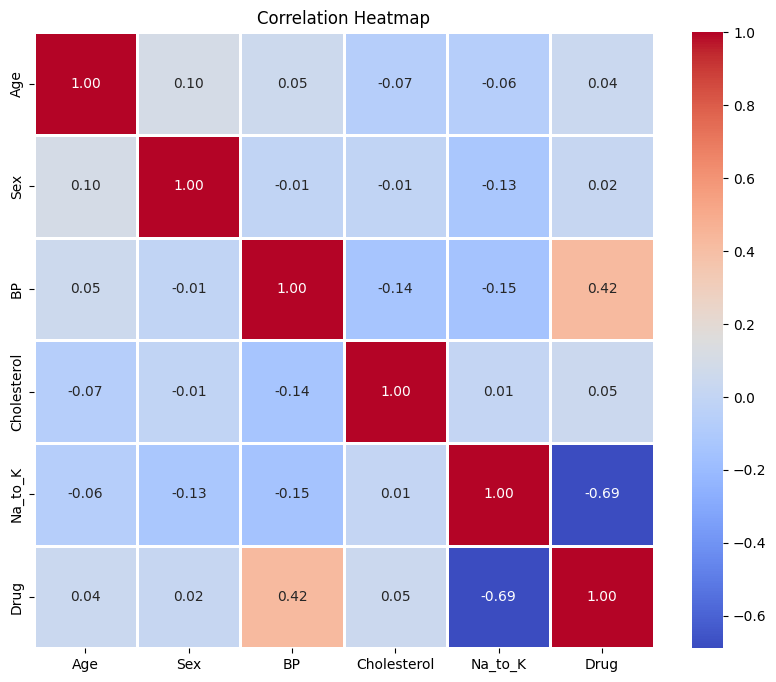

In [7]:
# สร้างกราฟ corelation ของแต่ละคอลัมน์ใน dataframe
corr_matrix = data.corr()  # เรียกดู correlation ของแต่ละคอลัมน์ใน dataframe
plt.figure(figsize=(10, 8)) # กำหนดขนาดของกราฟ
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=2) # สร้างกราฟ correlation matrix 
plt.title('Correlation Heatmap') # ตั้งชื่อกราฟ
plt.show() # แสดงผล

In [8]:
data.corr().Drug.sort_values(ascending=False) # แสดงผลคอลัมน์ที่มี correlation กับ 'Class' จากมากไปน้อย

Drug           1.000000
BP             0.419397
Cholesterol    0.048415
Age            0.041856
Sex            0.018239
Na_to_K       -0.689051
Name: Drug, dtype: float64

<h1 style="font-size: 18px;">1.6 ดูการกระจายตัวของข้อมูล</h1>

Drug
0    91
4    54
1    23
3    16
2    16
Name: count, dtype: int64


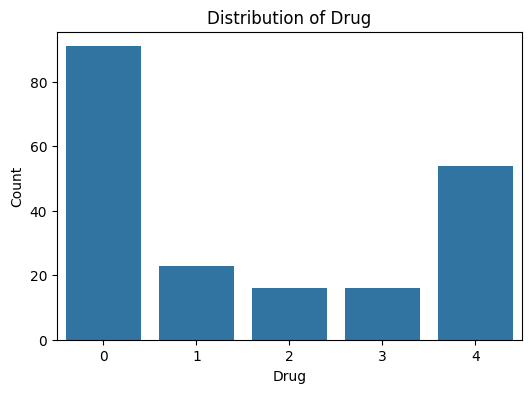

In [9]:
# แสดงจำนวนของแต่ละคลาสในคอลัมน์ 'Drug'
class_counts = data['Drug'].value_counts()
print(class_counts)

# แสดงการกระจายตัวของคลาสในคอลัมน์ 'Drug'
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Drug')
plt.title('Distribution of Drug')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.show()

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">2. ปรับปรุงข้อมูล (Data Preprocessing)</h1>

In [10]:
# นำเข้าไลบรารี sklearn.preprocessing เพื่อเรียกใช้ StandardScaler
from sklearn.preprocessing import StandardScaler

# นำฟังก์ชัน StandardScaler() เก็บไว้ในตัวแปร pre_process
scaler = StandardScaler()

<h1 style="font-size: 18px;">2.1 ทำการ Standardize ข้อมูลส่วน Features ที่ต้องการ</h1>

In [11]:
data['Age'] = scaler.fit_transform(data[['Age']])
data['Na_to_K'] = scaler.fit_transform(data[['Na_to_K']])
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,-1.291591,0,0,0,1.286522,0
1,0.162699,1,1,0,-0.415145,3
2,0.162699,1,1,0,-0.828558,3
3,-0.988614,0,2,0,-1.149963,4
4,1.011034,0,1,0,0.271794,0
...,...,...,...,...,...,...
195,0.708057,0,1,0,-0.626917,3
196,-1.715759,1,1,0,-0.565995,3
197,0.465676,1,2,0,-0.859089,4
198,-1.291591,1,2,1,-0.286500,4


<h1 style="font-size: 18px;">2.2 แบ่งข้อมูลเป็นส่วน Features และ Label</h1>

In [12]:
# X เป็น Features
X = data.drop('Drug', axis=1)
# y เป็น Label
y = data['Drug']
# แปลง X ให้เป็น Array
X = np.array(X)
# แปลง y ให้เป็น Array
y = np.array(y)

In [13]:
print(type(X)) ; print(type(y)) # แสดง type ของ X และ y

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">3. แบ่งส่วนข้อมูล (Train-Test Split)</h1>

In [14]:
# นำเข้าไลบรารี sklearn.model_selection เพื่อเรียกใช้ train_test_split
from sklearn.model_selection import train_test_split

In [15]:
# แบ่งส่วนข้อมูล X เป็น X_train, X_test และ y เป็น y_train, y_test โดยมีอัตราส่วนแบ่งเป็น 0.8:0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)

In [16]:
print('length of X_train:',len(X_train),', length of X_test:', len(X_test)) # แสดงจำนวนข้อมูลใน X_train และ X_test

length of X_train: 160 , length of X_test: 40


In [17]:
# หรืออีกวิธีหนึ่ง เราสามารถดู shape ของข้อมูลที่เราแบ่งได้ โดยใช้คำสั่ง .shape 
print('shape of X_train:', X_train.shape)   # ดู shape ของ X_train
print('shape of X_test:', X_test.shape)     # ดู shape ของ X_test
print('shape of y_train:', y_train.shape)   # ดู shape ของ y_train
print('shape of y_test:', y_test.shape)     # ดู shape ของ y_test

shape of X_train: (160, 5)
shape of X_test: (40, 5)
shape of y_train: (160,)
shape of y_test: (40,)


<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">4. การใช้ Neural Networks Model ด้วย Scikit-Learn Library</h1>

In [18]:
 # นำเข้าไลบรารี sklearn.neural_network เพื่อเรียกใช้ MLPClassifier
from sklearn.neural_network import MLPClassifier

<h1 style="font-size: 18px;">4.1 สร้างโมเดล และ กำหนดการ compile ของโมเดล</h1>

In [19]:
# สร้างโมเดล
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32, 16), # กำหนด Input layer, Hidden Layers
    activation='relu',               # Activation function ที่จะใช้
    solver='adam',                   # Optimizer ที่จะใช้
    learning_rate_init=0.001,        # กำหนด learning rate
    alpha=0.0001,                    # คือพารามิเตอร์ L2 penalty (regularization term)
    batch_size=32,                   # สำหรับ SGD Algorithm
    max_iter=50,                     # จำนวนรอบการเทรน
    verbose=True,                    # แสดงผลระหว่างเทรน
    random_state=42                  # ควบคุมการทำผลซ้ำ
)

<h1 style="font-size: 18px;">4.2 เทรนโมเดล</h1>

In [20]:
# Train the model
mlp.fit(X_train, y_train)

Iteration 1, loss = 1.64602150
Iteration 2, loss = 1.54132091
Iteration 3, loss = 1.45132364
Iteration 4, loss = 1.37739362
Iteration 5, loss = 1.30613560
Iteration 6, loss = 1.23600882
Iteration 7, loss = 1.16245693
Iteration 8, loss = 1.09135047
Iteration 9, loss = 1.02044950
Iteration 10, loss = 0.94821693
Iteration 11, loss = 0.88588001
Iteration 12, loss = 0.82403577
Iteration 13, loss = 0.76819701
Iteration 14, loss = 0.71832280
Iteration 15, loss = 0.66906599
Iteration 16, loss = 0.62570274
Iteration 17, loss = 0.58827547
Iteration 18, loss = 0.54960662
Iteration 19, loss = 0.51551647
Iteration 20, loss = 0.48392208
Iteration 21, loss = 0.45470339
Iteration 22, loss = 0.42664855
Iteration 23, loss = 0.40055020
Iteration 24, loss = 0.37789694
Iteration 25, loss = 0.35773216
Iteration 26, loss = 0.33719618
Iteration 27, loss = 0.31932404
Iteration 28, loss = 0.30552883
Iteration 29, loss = 0.28761345
Iteration 30, loss = 0.27265437
Iteration 31, loss = 0.25979712
Iteration 32, los

/Users/ratchy_oak/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=32, hidden_layer_sizes=(64, 32, 16), max_iter=50,
              random_state=42, verbose=True)

<h1 style="font-size: 18px;">4.3 ใช้โมเดลที่เทรนแล้ว ทำนายข้อมูล unseen data อย่าง X_test</h1>

In [21]:
y_pred_mlp = mlp.predict(X_test)
y_proba = mlp.predict_proba(X_test)

In [22]:
y_pred_mlp

array([0, 1, 0, 0, 4, 4, 4, 4, 3, 3, 0, 1, 0, 4, 1, 0, 0, 0, 4, 0, 0, 1,
       0, 4, 0, 0, 4, 0, 1, 4, 0, 0, 0, 0, 2, 2, 4, 2, 3, 4])

In [23]:
y_proba

array([[5.85920580e-01, 6.26089702e-05, 2.75660560e-04, 9.95721046e-03,
        4.03783940e-01],
       [4.44151604e-03, 8.97446359e-01, 2.44201140e-02, 6.83792354e-02,
        5.31277587e-03],
       [8.45598477e-01, 1.18650896e-04, 1.53610408e-01, 6.03246334e-04,
        6.92174066e-05],
       [9.99999998e-01, 9.93407320e-14, 2.53422787e-10, 3.86620270e-11,
        1.74379508e-09],
       [4.14837201e-04, 7.02531108e-06, 4.69296068e-06, 1.81117361e-03,
        9.97762271e-01],
       [1.18653346e-02, 1.89642819e-04, 1.63279225e-05, 4.40748223e-02,
        9.43853872e-01],
       [1.94648251e-03, 3.39312281e-04, 8.72945437e-05, 2.76162168e-02,
        9.70010694e-01],
       [1.47818691e-03, 1.75610229e-04, 4.90603429e-05, 4.40777571e-02,
        9.54219385e-01],
       [5.60158446e-04, 2.24637782e-01, 6.70692364e-04, 7.26323486e-01,
        4.78078811e-02],
       [2.36232464e-01, 2.44265504e-02, 5.71097729e-03, 4.33265523e-01,
        3.00364485e-01],
       [9.99999983e-01, 8.1479

In [24]:
y_proba.round(2)

array([[0.59, 0.  , 0.  , 0.01, 0.4 ],
       [0.  , 0.9 , 0.02, 0.07, 0.01],
       [0.85, 0.  , 0.15, 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.01, 0.  , 0.  , 0.04, 0.94],
       [0.  , 0.  , 0.  , 0.03, 0.97],
       [0.  , 0.  , 0.  , 0.04, 0.95],
       [0.  , 0.22, 0.  , 0.73, 0.05],
       [0.24, 0.02, 0.01, 0.43, 0.3 ],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.07, 0.78, 0.1 , 0.05, 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.01, 0.77, 0.11, 0.1 , 0.01],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.06, 0.  , 0.  , 0.02, 0.92],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.93, 0.  , 0.06, 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.04, 0.95],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ,

In [25]:
y_proba = np.argmax(y_proba, axis=1)
y_proba

array([0, 1, 0, 0, 4, 4, 4, 4, 3, 3, 0, 1, 0, 4, 1, 0, 0, 0, 4, 0, 0, 1,
       0, 4, 0, 0, 4, 0, 1, 4, 0, 0, 0, 0, 2, 2, 4, 2, 3, 4])

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">5. การใช้ Neural Networks Model ด้วย Tensorflow-Keras</h1>

In [26]:
from tensorflow.keras.models import Sequential      # นำเข้าไลบรารี tensorflow.keras.models เพื่อเรียกใช้ Sequential
from tensorflow.keras.layers import Dense, Dropout  # นำเข้าไลบรารี tensorflow.keras.layers เพื่อเรียกใช้ Dense, Dropout
from tensorflow.keras.optimizers import Adam        # นำเข้าไลบรารี from tensorflow.keras.optimizers เพื่อเรียกใช้ Adam

/Users/ratchy_oak/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


<h1 style="font-size: 18px;">5.1 สร้างโมเดล</h1>

In [41]:
# สร้างโมเดล
model = Sequential()

# เพิ่ม Hidden layer แรก หลังจาก Input layer
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
 
# เพิ่ม Hidden layers อื่นๆ
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))

# เพิ่ม layer สุดท้าย เรียกว่า output layer
model.add(Dense(5, activation='softmax'))

# Assuming y_train contains the labels for your training data
class_labels, class_counts = np.unique(y_train, return_counts=True)

print("Class counts:", dict(zip(class_labels, class_counts)))

Class counts: {0: 73, 1: 18, 2: 13, 3: 13, 4: 43}


/Users/ratchy_oak/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<h1 style="font-size: 18px;">5.2 กำหนดการ compile ของโมเดล และเทรนโมเดล</h1>

In [28]:
# กำหนดการ compile ของโมเดล
model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
# ดูภาพรวมของโครงสร้างโมเดล
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,077 (12.02 KB)

 Trainable params: 3,077 (12.02 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# เทรนโมเดล
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2865 - loss: 1.5220 - val_accuracy: 0.3125 - val_loss: 1.3272
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4615 - loss: 1.3163 - val_accuracy: 0.3125 - val_loss: 1.1932
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5531 - loss: 1.0201 - val_accuracy: 0.4375 - val_loss: 1.0218
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6344 - loss: 0.9312 - val_accuracy: 0.7812 - val_loss: 0.8250
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6375 - loss: 0.9419 - val_accuracy: 0.7188 - val_loss: 0.7441
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7260 - loss: 0.7137 - val_accuracy: 0.7812 - val_loss: 0.6507
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6844 - loss: 0.7419 - val_accuracy: 0.7500 - val_loss: 0.5645
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8510 - loss: 0.4797 - val_accuracy: 0.7500 - val_loss: 0.4858
Epoch 9

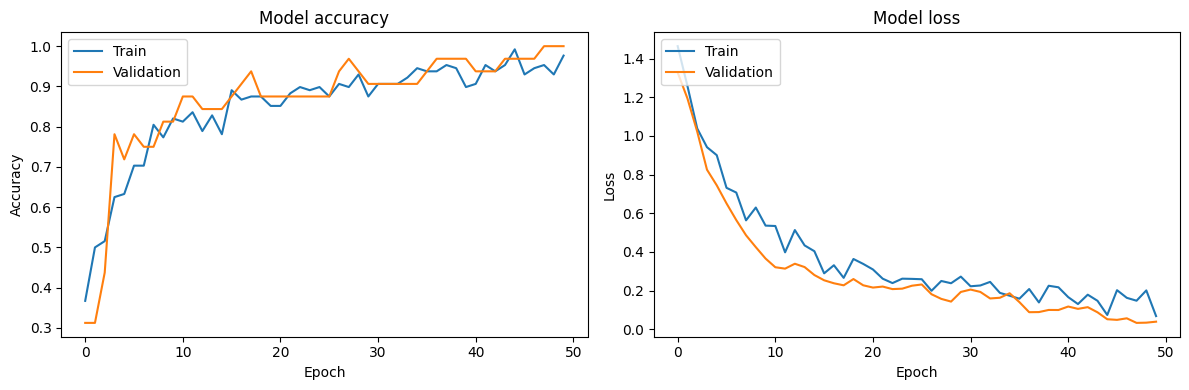

In [31]:
plt.figure(figsize=(12, 4))

# แสดงกราฟประวัติค่า accuracy ที่เกิดขึ้นระหว่างการเทรนโมเดล
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# แสดงกราฟประวัติค่า loss ที่เกิดขึ้นระหว่างการเทรนโมเดล
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

<h1 style="font-size: 18px;">5.3 ใช้โมเดลที่เทรนแล้ว ทำนายข้อมูล unseen data อย่าง X_test</h1>

In [32]:
y_pred = model.predict(X_test) # ให้โมเดลทำนาย Class จาก Features ที่กำหนดให้
print(y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[9.9972266e-01 1.9458915e-13 9.2252310e-11 1.3383009e-10 2.7737938e-04]
 [2.6468979e-06 9.9862462e-01 1.3656429e-03 6.9956022e-06 1.1014540e-07]
 [1.0000000e+00 1.0549989e-14 2.3840001e-12 7.8188770e-16 5.1620180e-10]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [4.7812741e-06 1.0255196e-11 9.7410274e-13 1.5351590e-06 9.9999368e-01]
 [3.7925438e-05 1.7897104e-07 3.7824299e-09 9.7677321e-04 9.9898511e-01]
 [1.6592846e-03 5.3388635e-06 1.6463083e-06 3.0477177e-03 9.9528605e-01]
 [4.5979388e-05 1.1800036e-06 3.2409286e-08 6.8972441e-03 9.9305546e-01]
 [7.4611980e-06 5.1821140e-03 1.6663463e-06 9.5710588e-01 3.7702933e-02]
 [1.0189600e-02 4.1741993e-02 1.7918264e-02 7.7093154e-01 1.5921849e-01]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.1797588e-03 9.4367248e-01 5.1084165e-02 3.8950886e-03 1.6861665e-04]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [2.6566764e-

In [33]:
y_pred = np.argmax(y_pred, axis=1) # ตั้ง Boundary ในการตัดสินใจว่าเป็นคลาสใด
y_pred

array([0, 1, 0, 0, 4, 4, 4, 4, 3, 3, 0, 1, 0, 4, 1, 0, 0, 0, 4, 0, 0, 1,
       0, 4, 0, 0, 0, 0, 1, 4, 0, 4, 0, 0, 2, 2, 4, 2, 3, 4])

In [34]:
print('y_pred:', y_pred)
print('y_test:', y_test)

y_pred: [0 1 0 0 4 4 4 4 3 3 0 1 0 4 1 0 0 0 4 0 0 1 0 4 0 0 0 0 1 4 0 4 0 0 2 2 4
 2 3 4]
y_test: [0 1 0 0 4 4 4 4 3 3 0 1 0 4 1 0 0 0 4 0 0 1 0 4 0 0 0 0 1 4 0 4 0 0 2 2 4
 2 3 4]


<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">6. การวัดผลโมเดล (Model Evaluation)</h1>

ในการวัดผลการทำ Binary-Classification Model เราต้องรู้จัก Confusion Matrix ก่อน

In [35]:
from sklearn.metrics import confusion_matrix  # นำเข้าไลบรารี sklearn.metrics เพื่อเรียกใช้ confusion_matrix

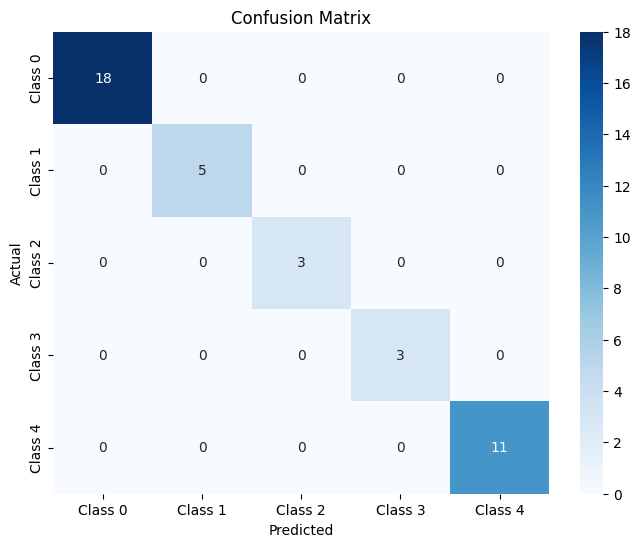

In [36]:
# ตัวอย่างการสร้าง confusion matrix
conf_matrix_sample = confusion_matrix(y_test, y_pred)

# แสดง confusion matrix โดยใช้ไลบรารี seaborn
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_sample, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"],
            yticklabels=["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"])

plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

<h1 style="font-size: 18px; font-weight: bold;">6.1 Accuracy - ค่าความแม่นยำ</h1>

- ความแม่นยำ เป็นตัววัดประสิทธิภาพที่เข้าใจได้ง่ายที่สุด มันคืออัตราส่วนของการทำนายที่ถูกต้องต่อการทำนายทั้งหมด
- สูตร:
$$\text{Accuracy} = \frac{\text{จำนวนการทำนายที่ถูกต้อง}}{\text{จำนวนการทำนายทั้งหมด}}$$
- หรือ:
$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

<h1 style="font-size: 18px; font-weight: bold;">6.2 Precision - ความแม่นยำของการทำนายคลาสบวก</h1>

- Precision คืออัตราส่วนของการทำนายคลาสบวกที่ถูกต้องต่อการทำนายคลาสบวกทั้งหมด:
- สูตร:
$$\text{Precision} = \frac{\text{TP}}{\text{TP + FP}}$$

<h1 style="font-size: 18px; font-weight: bold;">6.3 Recall / Sensitivity - ความครอบคลุม</h1>

- คืออัตราส่วนของการทำนายคลาสบวกที่ถูกต้องต่อคลาสบวกทั้งหมดในข้อมูลจริง:
- สูตร:
$$\text{Recall} = \frac{\text{TP}}{\text{TP + FN}}$$

<h1 style="font-size: 18px; font-weight: bold;">6.4 F1-Score - คะแนน F1 </h1>

- เป็นค่าเฉลี่ยแบบ harmonic ระหว่างความแม่นยำของการทำนายคลาสบวกและความครอบคลุม
- เป็นวิธีที่ดีในการแสดงประสิทธิภาพของโมเดลเมื่อข้อมูลบวกและข้อมูลลบมีจำนวนที่ไม่เท่ากัน:
- สูตร:
$$\text{คะแนน F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

<h1 style="font-size: 18px; font-weight: bold;">6.5 Matthew Correlation Coefficient (MCC) - ค่าสหสัมพันธ์แมทธิว </h1>

- คือค่าสหสัมพันธ์ระหว่างการทำนายและข้อมูลจริง ค่านี้จะอยู่ระหว่าง -1 และ 1 ซึ่งค่า 1 หมายถึงการทำนายที่ดีที่สุด ค่า -1 หมายถึงการทำนายที่แย่ที่สุด และค่า 0 หมายถึงการทำนายแบบสุ่ม:
- สูตร:
$$\text{MCC} = \frac{\text{TP} \times \text{TN} - \text{FP} \times \text{FN}}{\sqrt{(\text{TP} + \text{FP})(\text{TP} + \text{FN})(\text{TN} + \text{FP})(\text{TN} + \text{FN})}}$$


In [37]:
#นำเข้าไลบรารี sklearn.metrics เพื่อเรียกใช้ accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

In [38]:
# คำนวณผลของ metrics ต่างๆ
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)
mcc = matthews_corrcoef(y_test, y_pred)

# แสดงผล
print(f"ความแม่นยำ (Accuracy): {accuracy:.4f}")
print(f"ความแม่นยำของการทำนายคลาสบวก (Precision): {precision}")
print(f"ความครอบคลุม (Recall): {recall}")
print(f"คะแนน F1 (F1-Score): {f1}")
print(f"ค่าสหสัมพันธ์แมทธิว (MCC): {mcc:.4f}")

ความแม่นยำ (Accuracy): 1.0000
ความแม่นยำของการทำนายคลาสบวก (Precision): [1. 1. 1. 1. 1.]
ความครอบคลุม (Recall): [1. 1. 1. 1. 1.]
คะแนน F1 (F1-Score): [1. 1. 1. 1. 1.]
ค่าสหสัมพันธ์แมทธิว (MCC): 1.0000


<h1 style="font-size: 18px; font-weight: bold;">6.6 Classification Report</h1>

In [39]:
from sklearn.metrics import classification_report # นำเข้าไลบรารี sklearn.metrics เพื่อเรียกใช้ classification_report

In [40]:
# คำสั่งเรียกดู classification report
report = classification_report(y_test, y_pred)
# แสดงผล
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

